In [9]:
## pip install tensorflow
import tensorflow as tf 

import matplotlib.pyplot as plt 

# minst dataset 

In [10]:
mnist = tf.keras.datasets.mnist

# Divide into train and test datasets


In [11]:
(x_train , y_train),(x_test , y_test)= mnist.load_data()

In [12]:
x_train.shape


(60000, 28, 28)

In [13]:
## x_train has the data 
## y_train has the label 

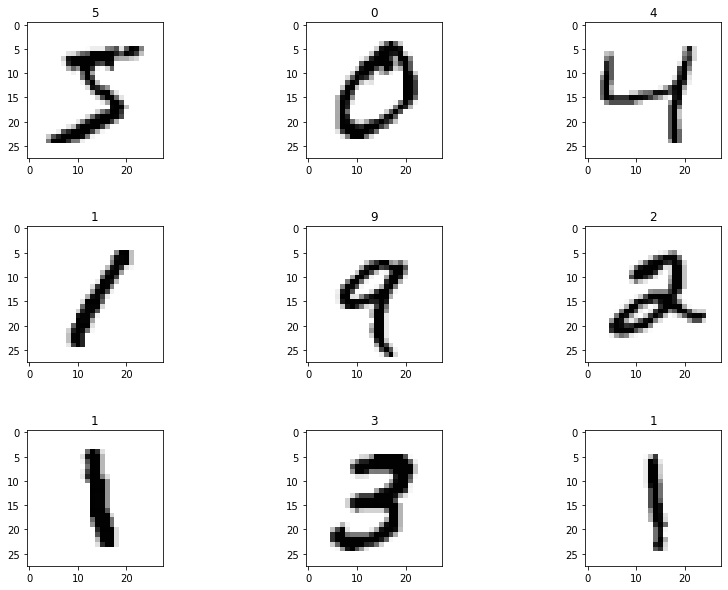

In [15]:
import random
fig, axs = plt.subplots(3,3, figsize=(15 ,10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

for i in range(9):
    index = random.randint(0, len(x_train) - 1)
    image = x_train[i].reshape(28, 28) * 255.
    axs[i].imshow(image,plt.cm.binary)
    axs[i].set_title(y_train[i])

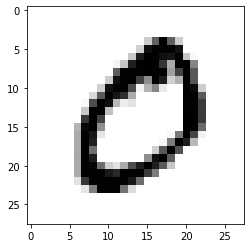

In [16]:
plt.imshow(x_train[1],cmap = plt.cm.binary)

# each pixel has a value from 0 to 255 , not colored

# Value for each pixel before Normalization 

In [179]:
print(x_train[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25


# pre processing we used normalization

In [18]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
##(x_train/255)
##(x_test/255)


## After Normalization making the values between 0-1 

In [19]:
print(x_train[1]) ## so if the color changes we dont worry about it 

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [20]:
print(y_train[1]) ## just to check the label -- x_train has data -- y_train has label

0


## Resizing images 

In [31]:
import numpy as np 
x_trainR = np.array(x_train).reshape(-1,28,28,1) ## increasing one dim to preform convolution operation
x_testR = np.array(x_test).reshape(-1,28,28,1) 
print("Training dim",x_trainR.shape)
print("Testing dim",x_testR.shape)

Training dim (60000, 28, 28, 1)
Testing dim (10000, 28, 28, 1)


# Creating a CNN

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout , Activation,Flatten,Conv2D, MaxPool2D

In [33]:
## creating a nueral network
model = Sequential()

## first Convolution Layer 

model.add(Conv2D(64,(3,3), input_shape = x_trainR.shape[1:])) ##number of filters is 64 each filter has 3x3 kernel size
model.add(Activation("relu"))  ## Activation function , <0 remove
model.add(MaxPool2D(pool_size=(2,2))) ## max pooling to reduce the size

## Second Convolution Layer

model.add(Conv2D(64,(3,3), input_shape = x_trainR.shape[1:]))
##padding , stride 
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2))) 


In [34]:
##First fully connected layer 
model.add(Flatten()) ## converting 2D to 1D for example 28x28 is 784
model.add(Dense(64)) # 784 connecting to each 64
model.add(Activation("relu"))

In [35]:
##Second fully connected layer 
model.add(Dense(32)) 
model.add(Activation("relu"))

In [36]:
##third fully connected layer 
model.add(Dense(10)) # the last 10 dense layers most have the same number of the classifcation which is 0-9
model.add(Activation("Softmax")) ## softMax to give the classification

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation_6 (Activation)   (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_7 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

# Train accuracy



In [38]:
print("Total training sample: ",len(x_train))

Total training sample:  60000


# By using adam optimizer

In [39]:
model.compile(loss = "sparse_categorical_crossentropy",optimizer = "adam",metrics=["accuracy"])
model.fit(x_train, y_train, epochs=5,validation_split=0.3) ## training the model

Epoch 1/5
1313/1313 [==============================] - 28s 20ms/step - loss: 0.2283 - accuracy: 0.9299 - val_loss: 0.1078 - val_accuracy: 0.9677
Epoch 2/5
1313/1313 [==============================] - 27s 20ms/step - loss: 0.0720 - accuracy: 0.9782 - val_loss: 0.0635 - val_accuracy: 0.9809
Epoch 3/5
1313/1313 [==============================] - 27s 20ms/step - loss: 0.0502 - accuracy: 0.9841 - val_loss: 0.0607 - val_accuracy: 0.9813
Epoch 4/5
1313/1313 [==============================] - 27s 20ms/step - loss: 0.0360 - accuracy: 0.9886 - val_loss: 0.0629 - val_accuracy: 0.9819
Epoch 5/5
1313/1313 [==============================] - 27s 21ms/step - loss: 0.0286 - accuracy: 0.9910 - val_loss: 0.0597 - val_accuracy: 0.9814


# By using SGD optimizer

In [40]:
model.compile(loss = "sparse_categorical_crossentropy",optimizer = "SGD",metrics=["accuracy"])
model.fit(x_train, y_train, epochs=5,validation_split=0.3) ## training the model

Epoch 1/5
1313/1313 [==============================] - 26s 20ms/step - loss: 0.0134 - accuracy: 0.9959 - val_loss: 0.0451 - val_accuracy: 0.9872
Epoch 2/5
1313/1313 [==============================] - 26s 20ms/step - loss: 0.0097 - accuracy: 0.9976 - val_loss: 0.0455 - val_accuracy: 0.9875
Epoch 3/5
1313/1313 [==============================] - 27s 20ms/step - loss: 0.0084 - accuracy: 0.9978 - val_loss: 0.0451 - val_accuracy: 0.9876
Epoch 4/5
1313/1313 [==============================] - 26s 20ms/step - loss: 0.0076 - accuracy: 0.9981 - val_loss: 0.0452 - val_accuracy: 0.9876
Epoch 5/5
1313/1313 [==============================] - 26s 20ms/step - loss: 0.0069 - accuracy: 0.9983 - val_loss: 0.0452 - val_accuracy: 0.9881


# Test accuracy


In [42]:
test_loss , test_acc = model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0338 - accuracy: 0.9905


# test predection 10k samples

In [43]:
y_pred = model.predict(x_testR)
correctly_classified = (np.argmax(y_pred, axis=1) == y_test)
Tindecies= [i for i in range(len(correctly_classified)) if correctly_classified[i] == True]
Findecies= [i for i in range(len(correctly_classified)) if correctly_classified[i] == False]

313/313 [==============================] - 2s 5ms/step


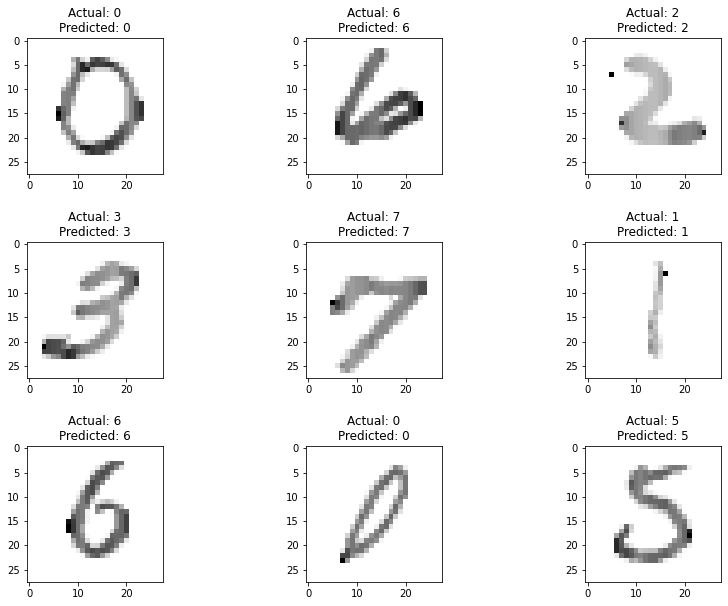

In [44]:
fig, axs = plt.subplots(3,3, figsize=(15, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

for i in range(9):
    index = random.choice(Tindecies)
    image = x_test[index].reshape(28, 28) * 255.
    axs[i].imshow(image,plt.cm.binary)
    axs[i].set_title("Actual: "+ str(y_test[index])+ "\nPredicted: "+ str(np.argmax(y_pred[index])))

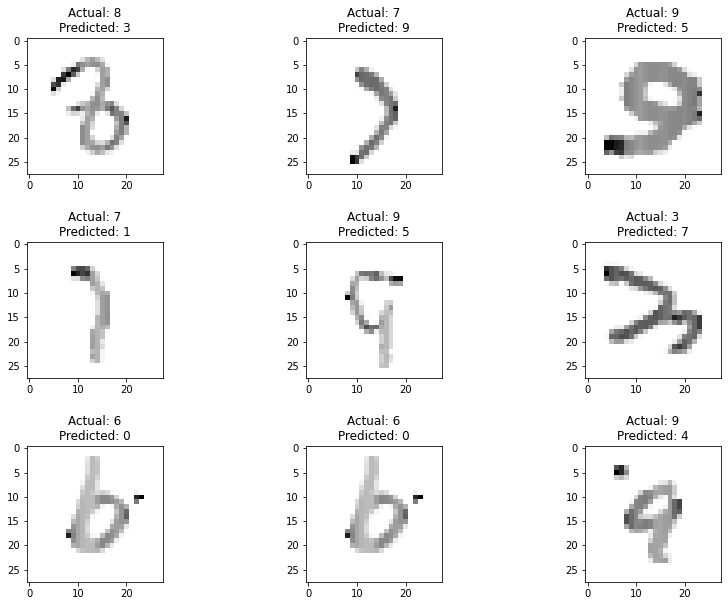

In [45]:
fig, axs = plt.subplots(3,3, figsize=(15, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

for i in range(9):
    index = random.choice(Findecies)
    image = x_test[index].reshape(28, 28) * 255.
    axs[i].imshow(image, plt.cm.binary)
    axs[i].set_title("Actual: "+ str(y_test[index])+ "\nPredicted: "+ str(np.argmax(y_pred[index])))

<AxesSubplot:>

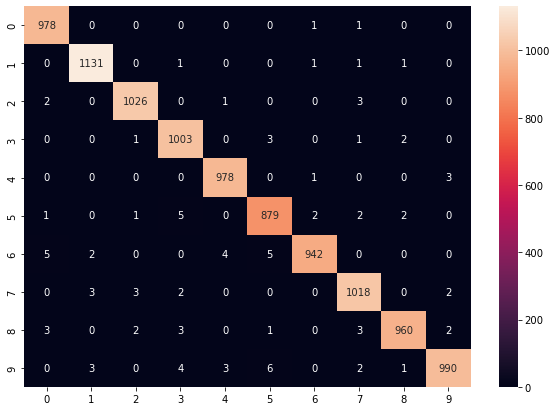

In [46]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn 

array = confusion_matrix(y_test, np.argmax(y_pred, axis=1))
df_cm = pd.DataFrame(array, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt="d")